## Aula 2 - Obtendo os clusters

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('CC GENERAL.CSV')

In [3]:
data.drop(columns=['CUST_ID', 'TENURE'], inplace=True) 

In [4]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [5]:
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [6]:
data.fillna(data.median(), inplace=True)

In [7]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(data.values)

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

## Aula 3 - Entendendo os critérios e métricas de validação

In [9]:
# Coeficiente de Silhouette
from sklearn.metrics import silhouette_score
labels = kmeans.labels_
silhouette = silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3645268652444429


## Aula 4 - Entendendo e calculando o índice Davies-Bouldin

In [10]:
from sklearn.metrics import davies_bouldin_score
dbs = davies_bouldin_score(values, labels)
print(dbs)

1.0758562764119166


## Aula 5 - Entendendo e calculando o índice Calinski-Harabasz

In [11]:
from sklearn.metrics import calinski_harabasz_score
chs = calinski_harabasz_score(values, labels)
print(chs)

3431.788779759367


## Aula 6 - Validando os clusters

In [12]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = silhouette_score(dataset, labels, metric='euclidean')
    dbs = davies_bouldin_score(dataset, labels)
    chs = calinski_harabasz_score(dataset, labels)
    
    return s, dbs, chs

In [13]:
clustering_algorithm(3, values)

(0.3272203126696238, 1.3096073640088426, 3526.440519908274)

In [14]:
clustering_algorithm(5, values)

(0.36459959298485145, 1.0753672296946832, 3431.7874878702146)

In [15]:
clustering_algorithm(10, values)

(0.351657893327692, 1.1137701491081322, 3019.113960624219)

In [16]:
clustering_algorithm(20, values)

(0.2966382537908831, 1.212307158940593, 2404.8596872372177)

In [17]:
clustering_algorithm(50, values)

(0.24078308215182606, 1.2373606182983259, 1606.8129664105106)

In [18]:
data.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [19]:
import numpy as np
random_data = np.random.rand(8950, 16)
print(clustering_algorithm(5, values))
print(clustering_algorithm(5, random_data))

(0.36456911048578505, 1.0750368113721949, 3431.7904873084876)
(0.039906010877248044, 3.485153324977243, 303.96599857716006)


In [20]:
set1, set2, set3 = np.array_split(values, 3)
print(clustering_algorithm(5, set1))
print(clustering_algorithm(5, set2))
print(clustering_algorithm(5, set3))

(0.36913858944625105, 1.0533246722185465, 1204.033970254312)
(0.35406999696241026, 1.1389554530299943, 1194.945411949724)
(0.3668564117315988, 1.0993525253456347, 1167.5313082261505)


## Aula7 - Visualizando Clusters

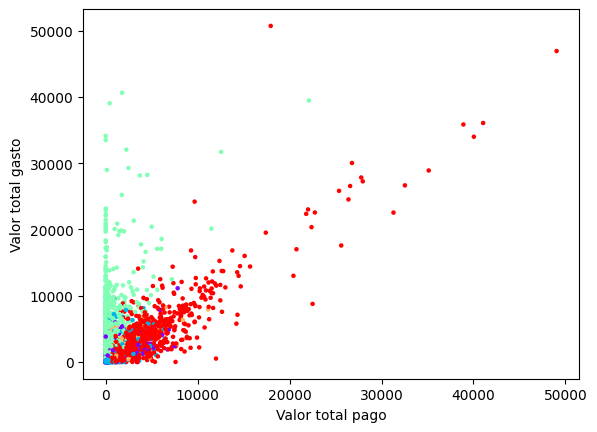

In [21]:
import matplotlib.pyplot as plt
plt.scatter(data['PURCHASES'], data['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')
plt.show()

In [22]:
# import seaborn as sns
data['clusters'] = labels
# sns.pairplot(data[0:], hue='clusters')

## Aula 8 - Entendendo os valores dos atributos no cluster

In [23]:
data.groupby('clusters').describe()

BALANCE                                                     
           count         mean          std        min          25%   
clusters                                                             
0         2650.0  3036.946177  2478.922442   6.824905  1255.154881  \
1         3279.0   443.776995   846.525522   0.000000    23.340435   
2         1072.0  1794.024195  1982.950586   0.000000   506.925348   
3          412.0  1987.146873  1852.215743  70.794108  1020.146724   
4         1537.0  1143.200471  1665.090233   0.000000   212.282538   

                                                 BALANCE_FREQUENCY             
                  50%          75%           max             count      mean   
clusters                                                                       
0         2173.994774  4223.858877  18495.558550            2650.0  0.963514  \
1           82.902896   410.659944   9630.367575            3279.0  0.774514   
2         1087.920500  2308.762488  14581.459140            1072.0  0.862131   
3         1338.918346  2133.415063  11670.179850             412.0  0.989512   
4          555.131027  1370.317105  19043.138560            1537.0  0.928267   

          ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT             
          ...              75%           max            count      mean   
clusters  ...                                                             
0         ...      1330.541571   8345.641905           2650.0  0.001798  \
1         ...       248.766884   4483.503862           3279.0  0.246881   
2         ...       884.718306  21235.065300           1072.0  0.117384   
3         ...      7086.774783  76406.207520            412.0  0.019271   
4         ...       523.893953  18621.013310           1537.0  0.278258   

                                                       
               std  min  25%       50%       75%  max  
clusters                                               
0         0.023256  0.0  0.0  0.000000  0.000000  0.6  
1         0.346775  0.0  0.0  0.000000  0.444444  1.0  
2         0.186853  0.0  0.0  0.083333  0.142857  1.0  
3         0.090795  0.0  0.0  0.000000  0.000000  1.0  
4         0.367029  0.0  0.0  0.083333  0.545455  1.0  

[5 rows x 128 columns]

In [24]:
centroids = kmeans.cluster_centers_
print(centroids)

[[5.03886149e-01 2.72144714e-04 6.15751915e-02 3.61893482e-02
  2.54075483e-02 2.53219709e-01 6.71312176e-05 2.56644637e-05
  4.48814714e-05 5.75359114e-05 1.15794119e-03 1.32612254e-03
  7.19404134e-01 1.66061928e-01 1.79050745e-01 5.79660872e-07]
 [6.89799575e-02 2.30763006e-04 1.21587120e-01 4.79794677e-02
  7.37079733e-02 2.40200669e-02 1.73016299e-04 3.36944404e-05
  1.40456777e-04 7.83464589e-06 1.22859223e-04 2.86637386e-03
  9.43639117e-01 1.53810130e-01 5.68564456e-02 7.61967577e-05]
 [2.35141479e-01 2.16555293e-04 6.03857074e-02 3.44170171e-02
  2.59739049e-02 4.00128071e-01 5.26401668e-05 2.04882397e-05
  3.51921361e-05 6.54864556e-05 1.57199032e-03 1.12217156e-03
  5.35089146e-01 5.98040052e-01 1.04348171e-01 2.77498236e-05]
 [3.33483624e-01 2.68969713e-04 1.59146477e-01 3.61931219e-02
  1.23336164e-01 5.80731211e-02 1.67333390e-04 2.64804728e-05
  1.47698430e-04 1.92281888e-05 4.25862512e-04 3.87053484e-03
  3.77114118e-01 2.52735252e-01 6.78741705e-01 4.21940580e-06]
 [1.

In [25]:
centroids[0]

array([5.03886149e-01, 2.72144714e-04, 6.15751915e-02, 3.61893482e-02,
       2.54075483e-02, 2.53219709e-01, 6.71312176e-05, 2.56644637e-05,
       4.48814714e-05, 5.75359114e-05, 1.15794119e-03, 1.32612254e-03,
       7.19404134e-01, 1.66061928e-01, 1.79050745e-01, 5.79660872e-07])

In [31]:
maxx = len(centroids[0])
for i in range(maxx):
    print(data.columns.values[i], '{:.4f}'.format(centroids[:, i].var()))

BALANCE 0.0224
BALANCE_FREQUENCY 0.0000
PURCHASES 0.0196
ONEOFF_PURCHASES 0.0077
INSTALLMENTS_PURCHASES 0.0036
CASH_ADVANCE 0.0226
PURCHASES_FREQUENCY 0.0000
ONEOFF_PURCHASES_FREQUENCY 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 0.0000
CASH_ADVANCE_FREQUENCY 0.0000
CASH_ADVANCE_TRX 0.0000
PURCHASES_TRX 0.0000
CREDIT_LIMIT 0.0360
PAYMENTS 0.0280
MINIMUM_PAYMENTS 0.0541
PRC_FULL_PAYMENT 0.0000


In [40]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'clusters'],
      dtype='object')

In [47]:
centroids[:, 0]

array([0.50388615, 0.06897996, 0.23514148, 0.33348362, 0.16014632])

In [57]:
description = data.groupby('clusters')[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']]
n_clients = description.size()
description = round(description.mean(), 2)
description['n_clients'] = n_clients
print(description)

          BALANCE  PURCHASES  CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  n_clients
clusters                                                                     
0         3036.95     385.30       1637.38       4495.58    968.78       2650
1          443.78     629.28        140.65       5130.89    814.34       3279
2         1794.02     475.49       3270.25       3976.37   4709.56       1072
3         1987.15     858.33        420.11       2226.70   1338.97        412
4         1143.20    3273.17        183.38       4102.97   3040.90       1537
